## Homework

The goal of this notebook is:

* Data preparation and data cleaning
* EDA
* feature importance analysis
* Model selection process and parameter tuning

The variable to predict will be 'gender'

### Dataset

In this notebook, we will use the Young People Survey data from [Kaggle](https://www.kaggle.com/datasets/miroslavsabo/young-people-survey).

##### Observations

* The data file (responses.csv) consists of 1010 rows and 150 columns (139
integer and 11 categorical).
* For convenience, the original variable names were shortened in the
data file. See the columns.csv file if you want to match the data with the original names.
* The data contain missing values.
* The survey was presented to participants in both electronic and written form.
* The original questionnaire was in Slovak language and was later translated
into English.
* All participants were of Slovakian nationality, aged between 15-30.


In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# 1) Data preparation

In [104]:
df = pd.read_csv('responses.csv')

In [105]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('-','')

In [106]:
df.head()

music  slow_songs_or_fast_songs  dance  folk  country  classical_music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   musical  pop  rock  metal_or_hardrock  ...   age  height  weight  \
0      1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1      2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2      5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3      1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4      3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   

   number_of_siblings  gender  left__right_handed                education  \
0                 1.0  female        right handed  college/bachelor degree   
1                 2.0  female        right handed  college/bachelor degree   
2                 2.0  female        right handed         secondary school   
3                 1.0  female        right handed  college/bachelor degree   
4                 1.0  female        right handed         secondary school   

   only_child  village__town  house__block_of_flats  
0          no        village         block of flats  
1          no           city         block of flats  
2          no           city         block of flats  
3         yes           city         house/bungalow  
4          no        village         house/bungalow  

[5 rows x 150 columns]

#### 1.1 Describe data

In [107]:
df.describe()

music  slow_songs_or_fast_songs        dance         folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           country  classical_music      musical          pop         rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845     1.161400     1.184861   
min       1.000000         1.000000     1.000000     1.000000     1.000000   
25%       1.000000         2.000000     2.000000     3.000000     3.000000   
50%       2.000000         3.000000     3.000000     4.000000     4.000000   
75%       3.000000         4.000000     4.000000     4.000000     5.000000   
max       5.000000         5.000000     5.000000     5.000000     5.000000   

       metal_or_hardrock  ...  shopping_centres  branded_clothing  \
count        1007.000000  ...       1008.000000       1008.000000   
mean            2.361470  ...          3.234127          3.050595   
std             1.372995  ...          1.323062          1.306321   
min             1.000000  ...          1.000000          1.000000   
25%             1.000000  ...          2.000000          2.000000   
50%             2.000000  ...          3.000000          3.000000   
75%             3.000000  ...          4.000000          4.000000   
max             5.000000  ...          5.000000          5.000000   

       entertainment_spending  spending_on_looks  spending_on_gadgets  \
count             1007.000000        1007.000000          1010.000000   
mean                 3.201589           3.106256             2.870297   
std                  1.188947           1.205368             1.284970   
min                  1.000000           1.000000             1.000000   
25%                  2.000000           2.000000             2.000000   
50%                  3.000000           3.000000             3.000000   
75%                  4.000000           4.000000             4.000000   
max                  5.000000           5.000000             5.000000   

       spending_on_healthy_eating          age      height      weight  \
count                  1008.00000  1003.000000  990.000000  990.000000   
mean                      3.55754    20.433699  173.514141   66.405051   
std                       1.09375     2.828840   10.024505   13.839561   
min                       1.00000    15.000000   62.000000   41.000000   
25%                       3.00000    19.000000  167.000000   55.000000   
50%                       4.00000    20.000000  173.000000   64.000000   
75%                       4.00000    22.000000  180.000000   75.000000   
max                       5.00000    30.000000  203.000000  165.000000   

       number_of_siblings  
count         1004.000000  
mean             1.297809  
std              1.013348  
min              0.000000  
25%              1.000000  
50%              1.000000  
75%              2.000000  
max             10.000000  

[8 rows x 139 columns]

In [108]:
df.dtypes.value_counts()

float64    134
object      11
int64        5
dtype: int64

<AxesSubplot:>

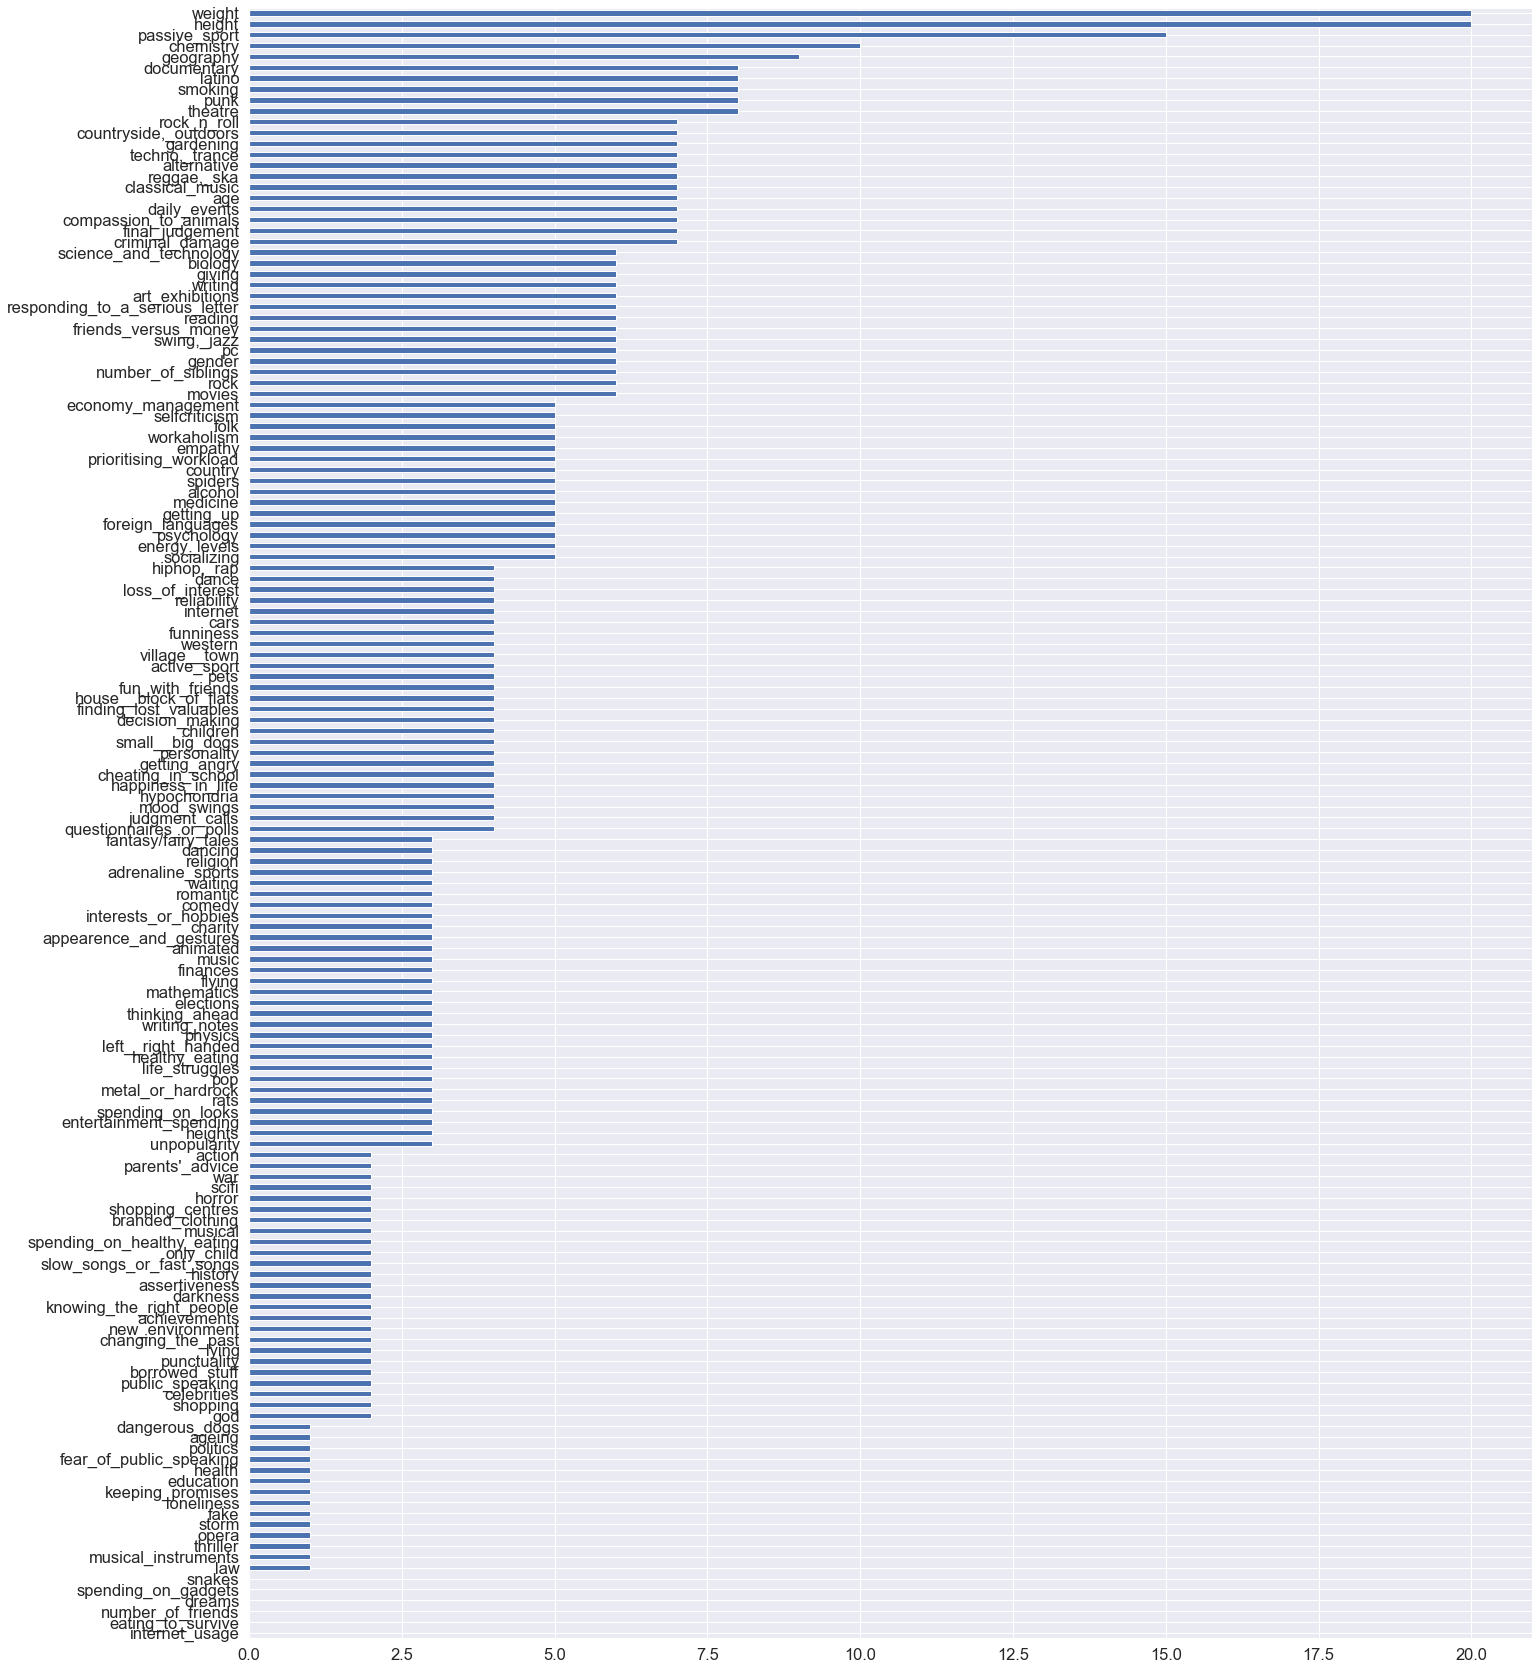

In [109]:
nulls = df.isnull().sum().sort_values()
nulls.plot.barh(  figsize=(23, 30))

`Weight` and `height` are the main characteristics that have missing values

In [110]:
df_nulls = pd.concat([df['weight'].isnull(),df['height'].isnull(),df['gender']],axis=1) 
df_nulls.groupby('gender').sum()

weight  height
gender                
female      13      13
male         6       6

Women omitted 13 values, which is more than double that of men 

In [111]:
df['gender'].isnull().sum()

6

6 rows have no gender. these rows will be deleted

In [112]:
df =df.dropna(subset=['gender'])

### 1.2 Validation framework

- `Note`: More steps are needed to complete the validation framework, this will be done later.

In [113]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [114]:
len(df_train), len(df_test)

(803, 201)

# 2) EDA

### 2.1) plots by topic 

In [204]:
def plot_group_differences(start='music',end='metal_or_hardrock',title='Music preferences'):
    #process the data
    df_range = df_train.loc[:, start:end]
    df_by_gender = pd.concat([df_range,df['gender']],axis=1)
    df_unpivot = pd.melt(df_by_gender, id_vars='gender')
    df_stats =df_unpivot.groupby(['variable','gender']).mean().reset_index()
    #Get the length and index of the data for visualization parameters
    len_values = int(len(df_stats)*0.5) #Half because the group is divided by female and male 
    group_index =list(range(len_values))
    figHeight = int(len_values*0.5)
    #Global styles
    fig, ax = plt.subplots()
    plt.rc('font', size=18)
    sns.set(rc={"figure.figsize":(20, figHeight)},font_scale=1.5) 
    
    #Draw plot
    sns.scatterplot(y="variable",x="value",data=df_stats, hue="gender" ,s=400)
    
    #Plot styles
    ax.hlines(y=group_index, xmin=1, xmax=5, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
    ax.vlines(x=3, ymin=0, ymax=len_values, color='red', alpha=0.7, linewidth=5, linestyles='solid')
    ax.set_xlim(1, 5)
    ax.set(xlabel='avg response', ylabel=title )
    plt.yticks(fontweight = 'bold')
    sns.move_legend( ax, "lower center",  bbox_to_anchor=(0.5, 1), ncol=2)
        

### Music preferences

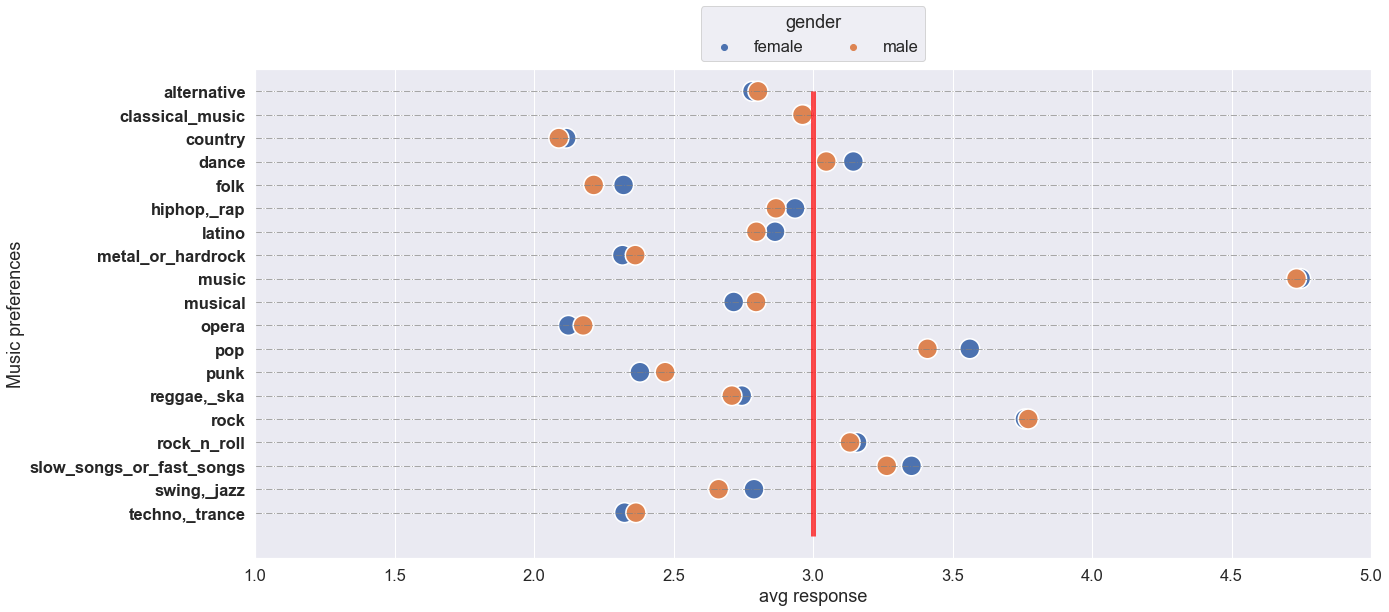

In [205]:
plot_group_differences('music','opera','Music preferences')

### Movie preferences

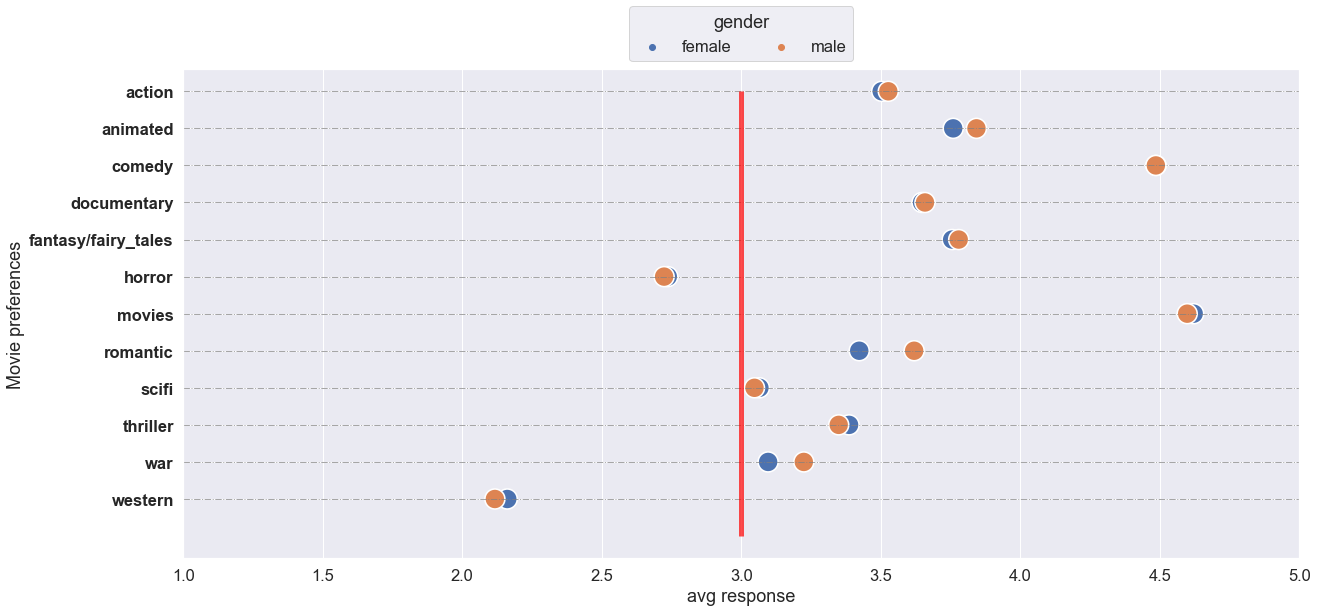

In [206]:
plot_group_differences('movies','action','Movie preferences')

### HOBBIES & INTERESTS

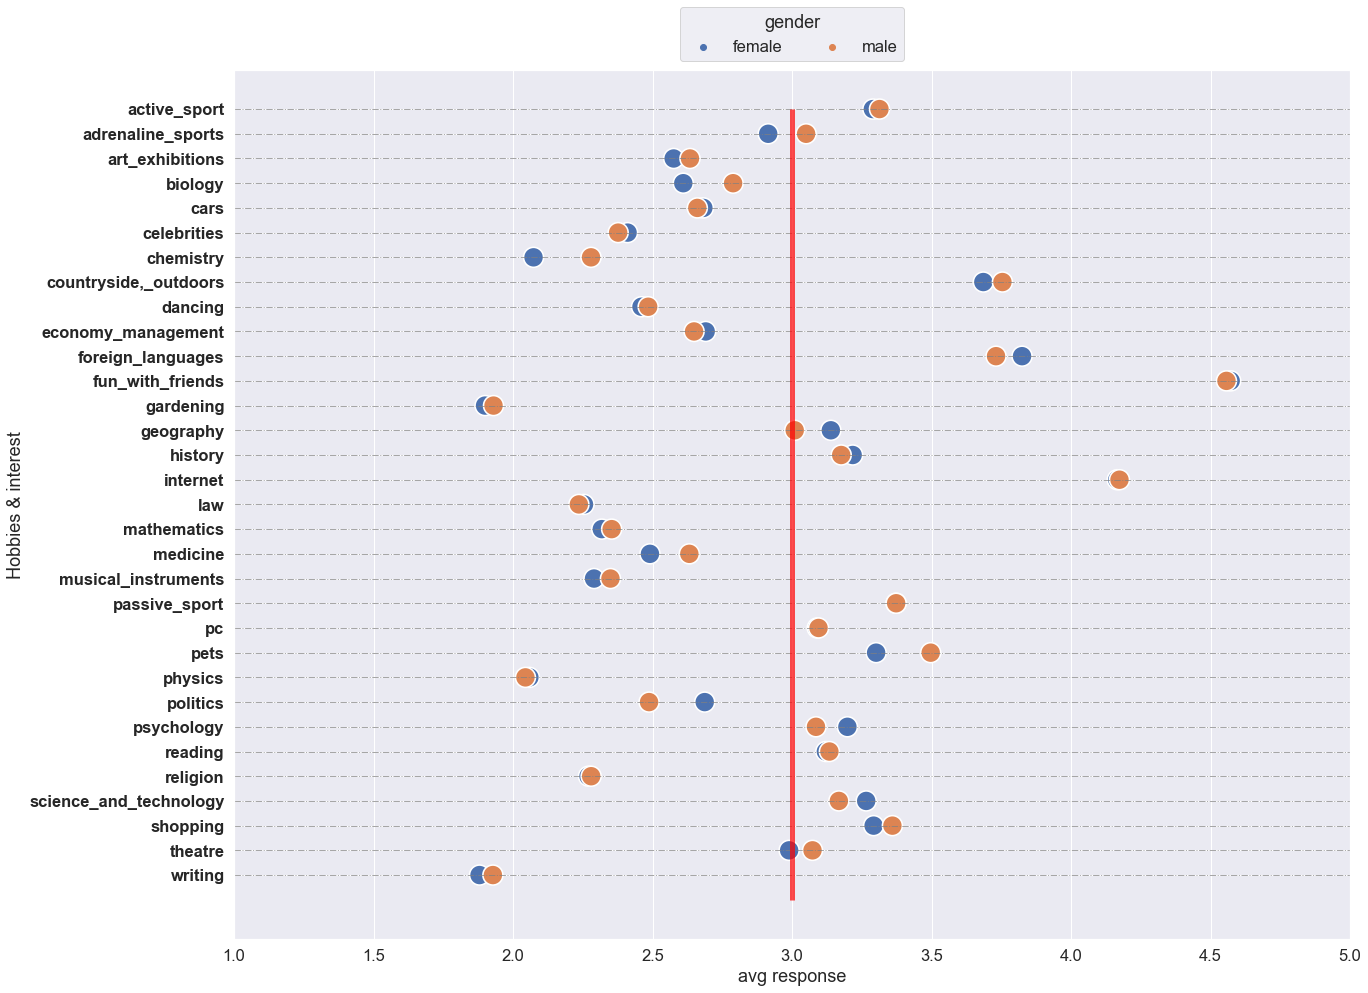

In [208]:
plot_group_differences('history','pets','Hobbies & interest')

### PHOBIAS

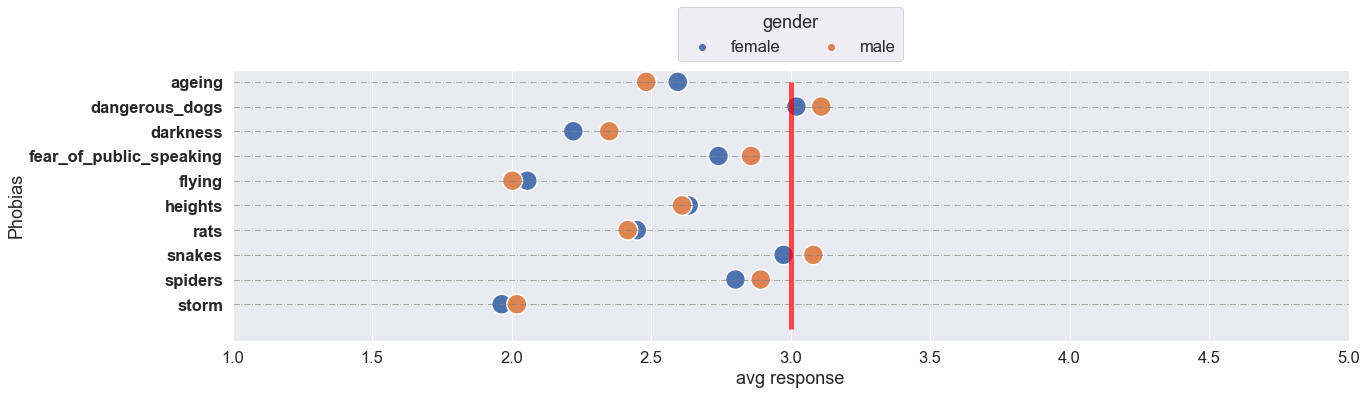

In [210]:
plot_group_differences('flying','fear_of_public_speaking','Phobias')

### HEALTH HABITS


<AxesSubplot:xlabel='alcohol', ylabel='count'>

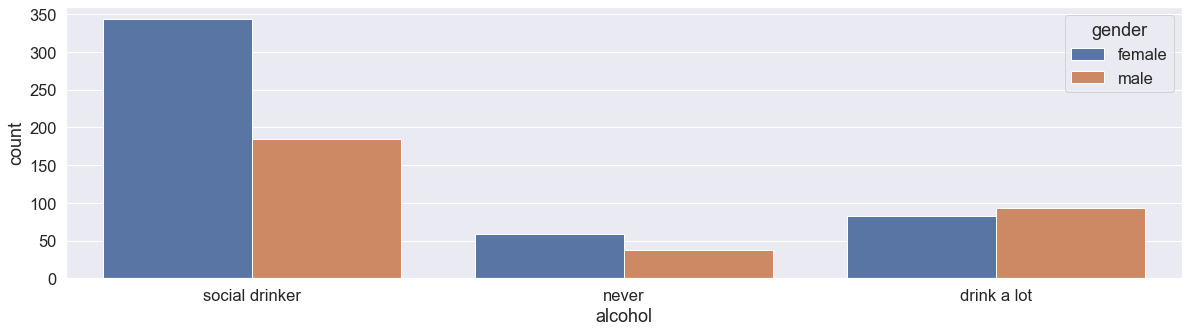

In [120]:
sns.countplot(data=df_train[['alcohol','gender']], x="alcohol", hue="gender")


### SPENDING HABITS

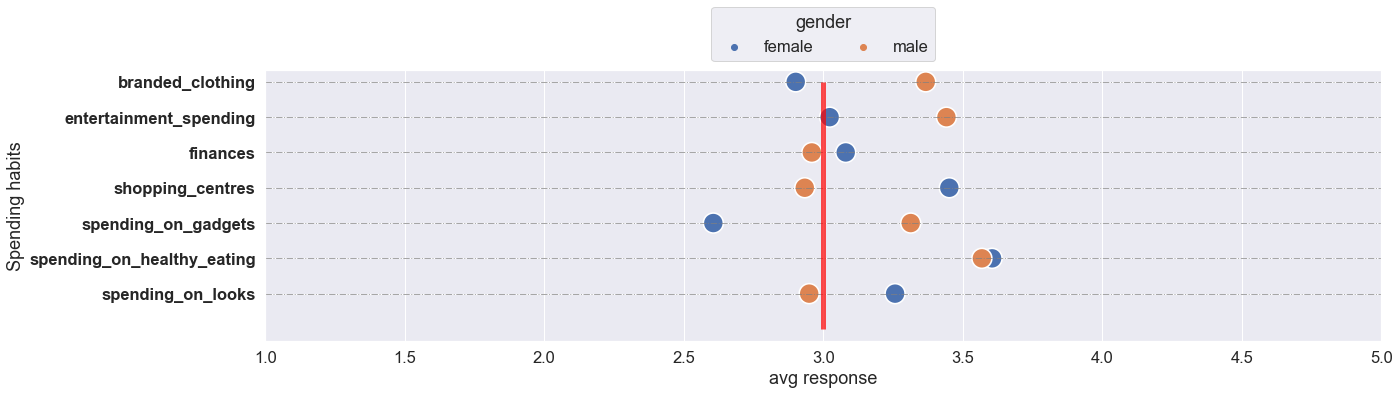

In [121]:
plot_group_differences('finances','spending_on_healthy_eating','Spending habits')

### DEMOGRAPHICS
- Analysis for categorical variables

In [122]:
cat_var = ['left__right_handed','education','only_child','village__town','house__block_of_flats']
cat_df = df_train[[*cat_var,'gender']]

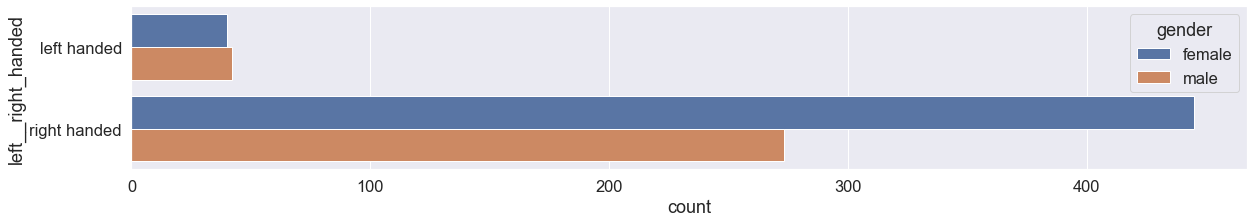

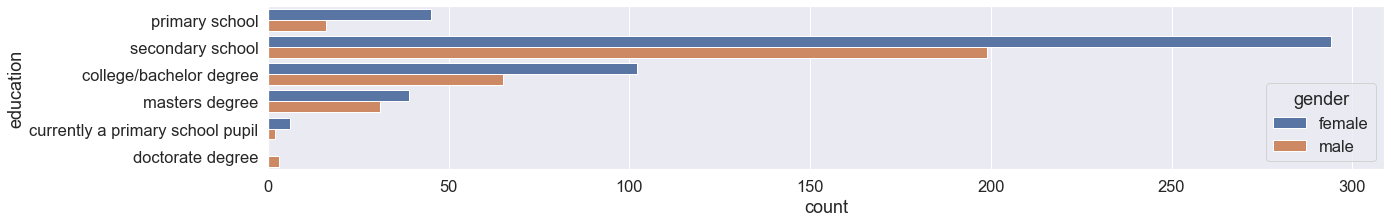

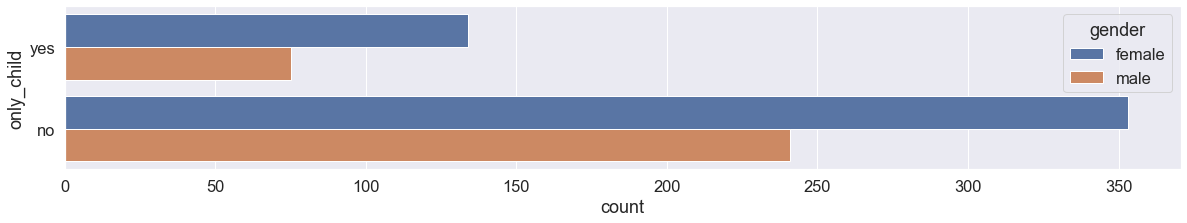

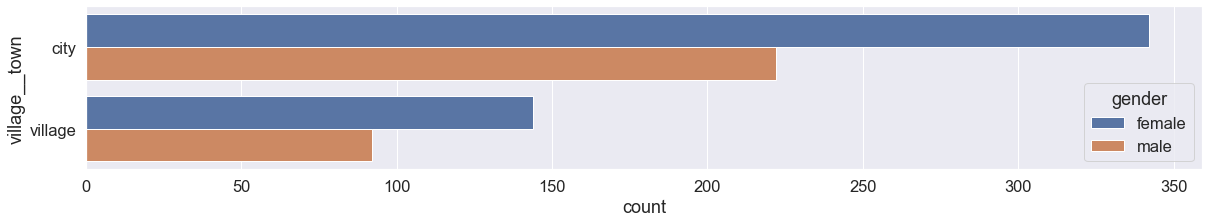

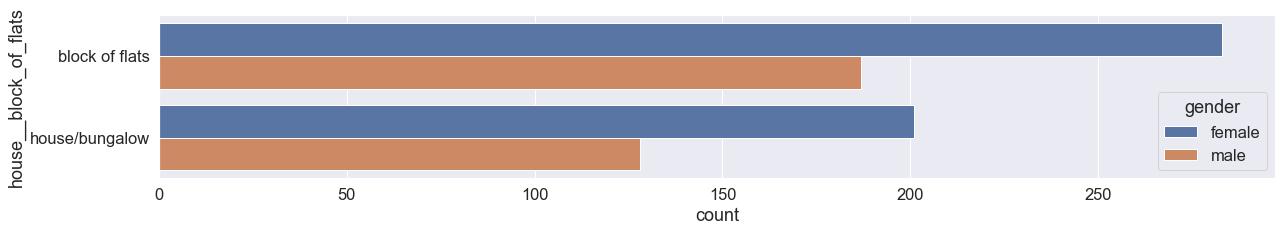

In [123]:
for var in cat_var:
    sns.countplot(data=cat_df ,y=var,  hue="gender")
    plt.show()

- Analysis for numerical variables

In [124]:
num_var = ['age','height','weight']
num_df = df_train[[*num_var,'gender']]

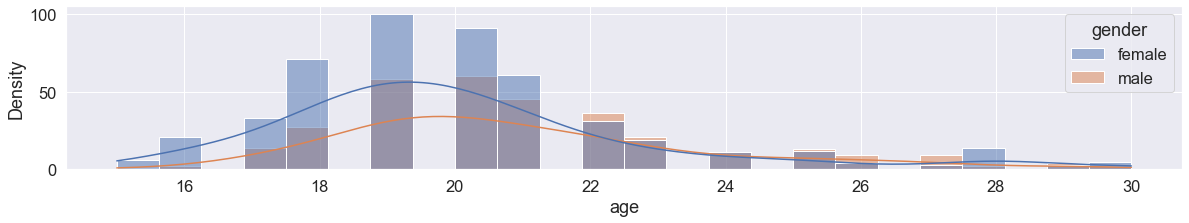

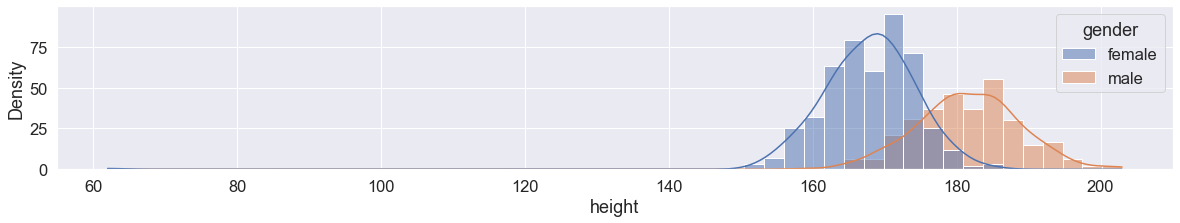

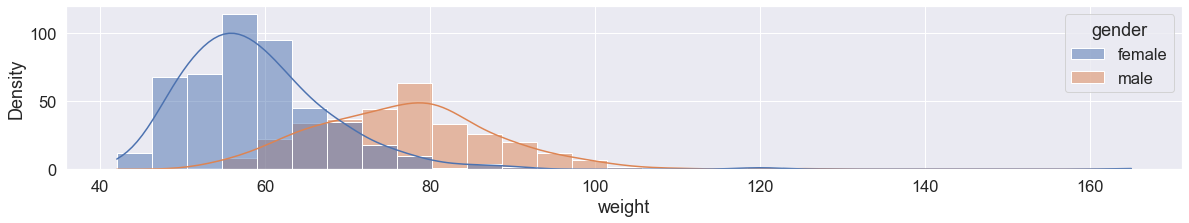

In [125]:

for var in num_var:
    sns.histplot(data=num_df , x=var, kde=True, hue="gender")
    plt.ylabel('Density')
    plt.show()


### 2.2) Is imbalanced dataset? 

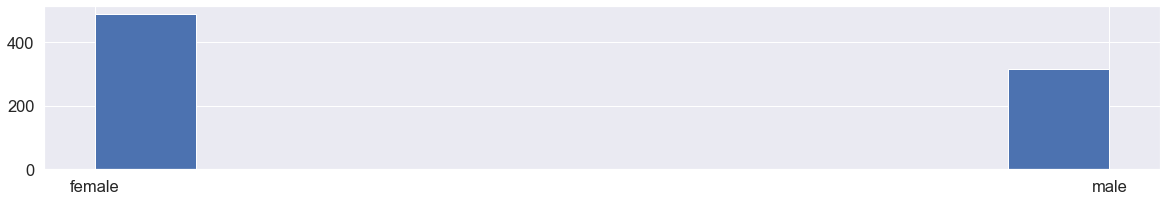

In [126]:
df_train['gender'].hist()
print()

### 2.3) Correlation

In [127]:
corr = df.corr()

Text(0.5, 1.0, 'Features correlation')

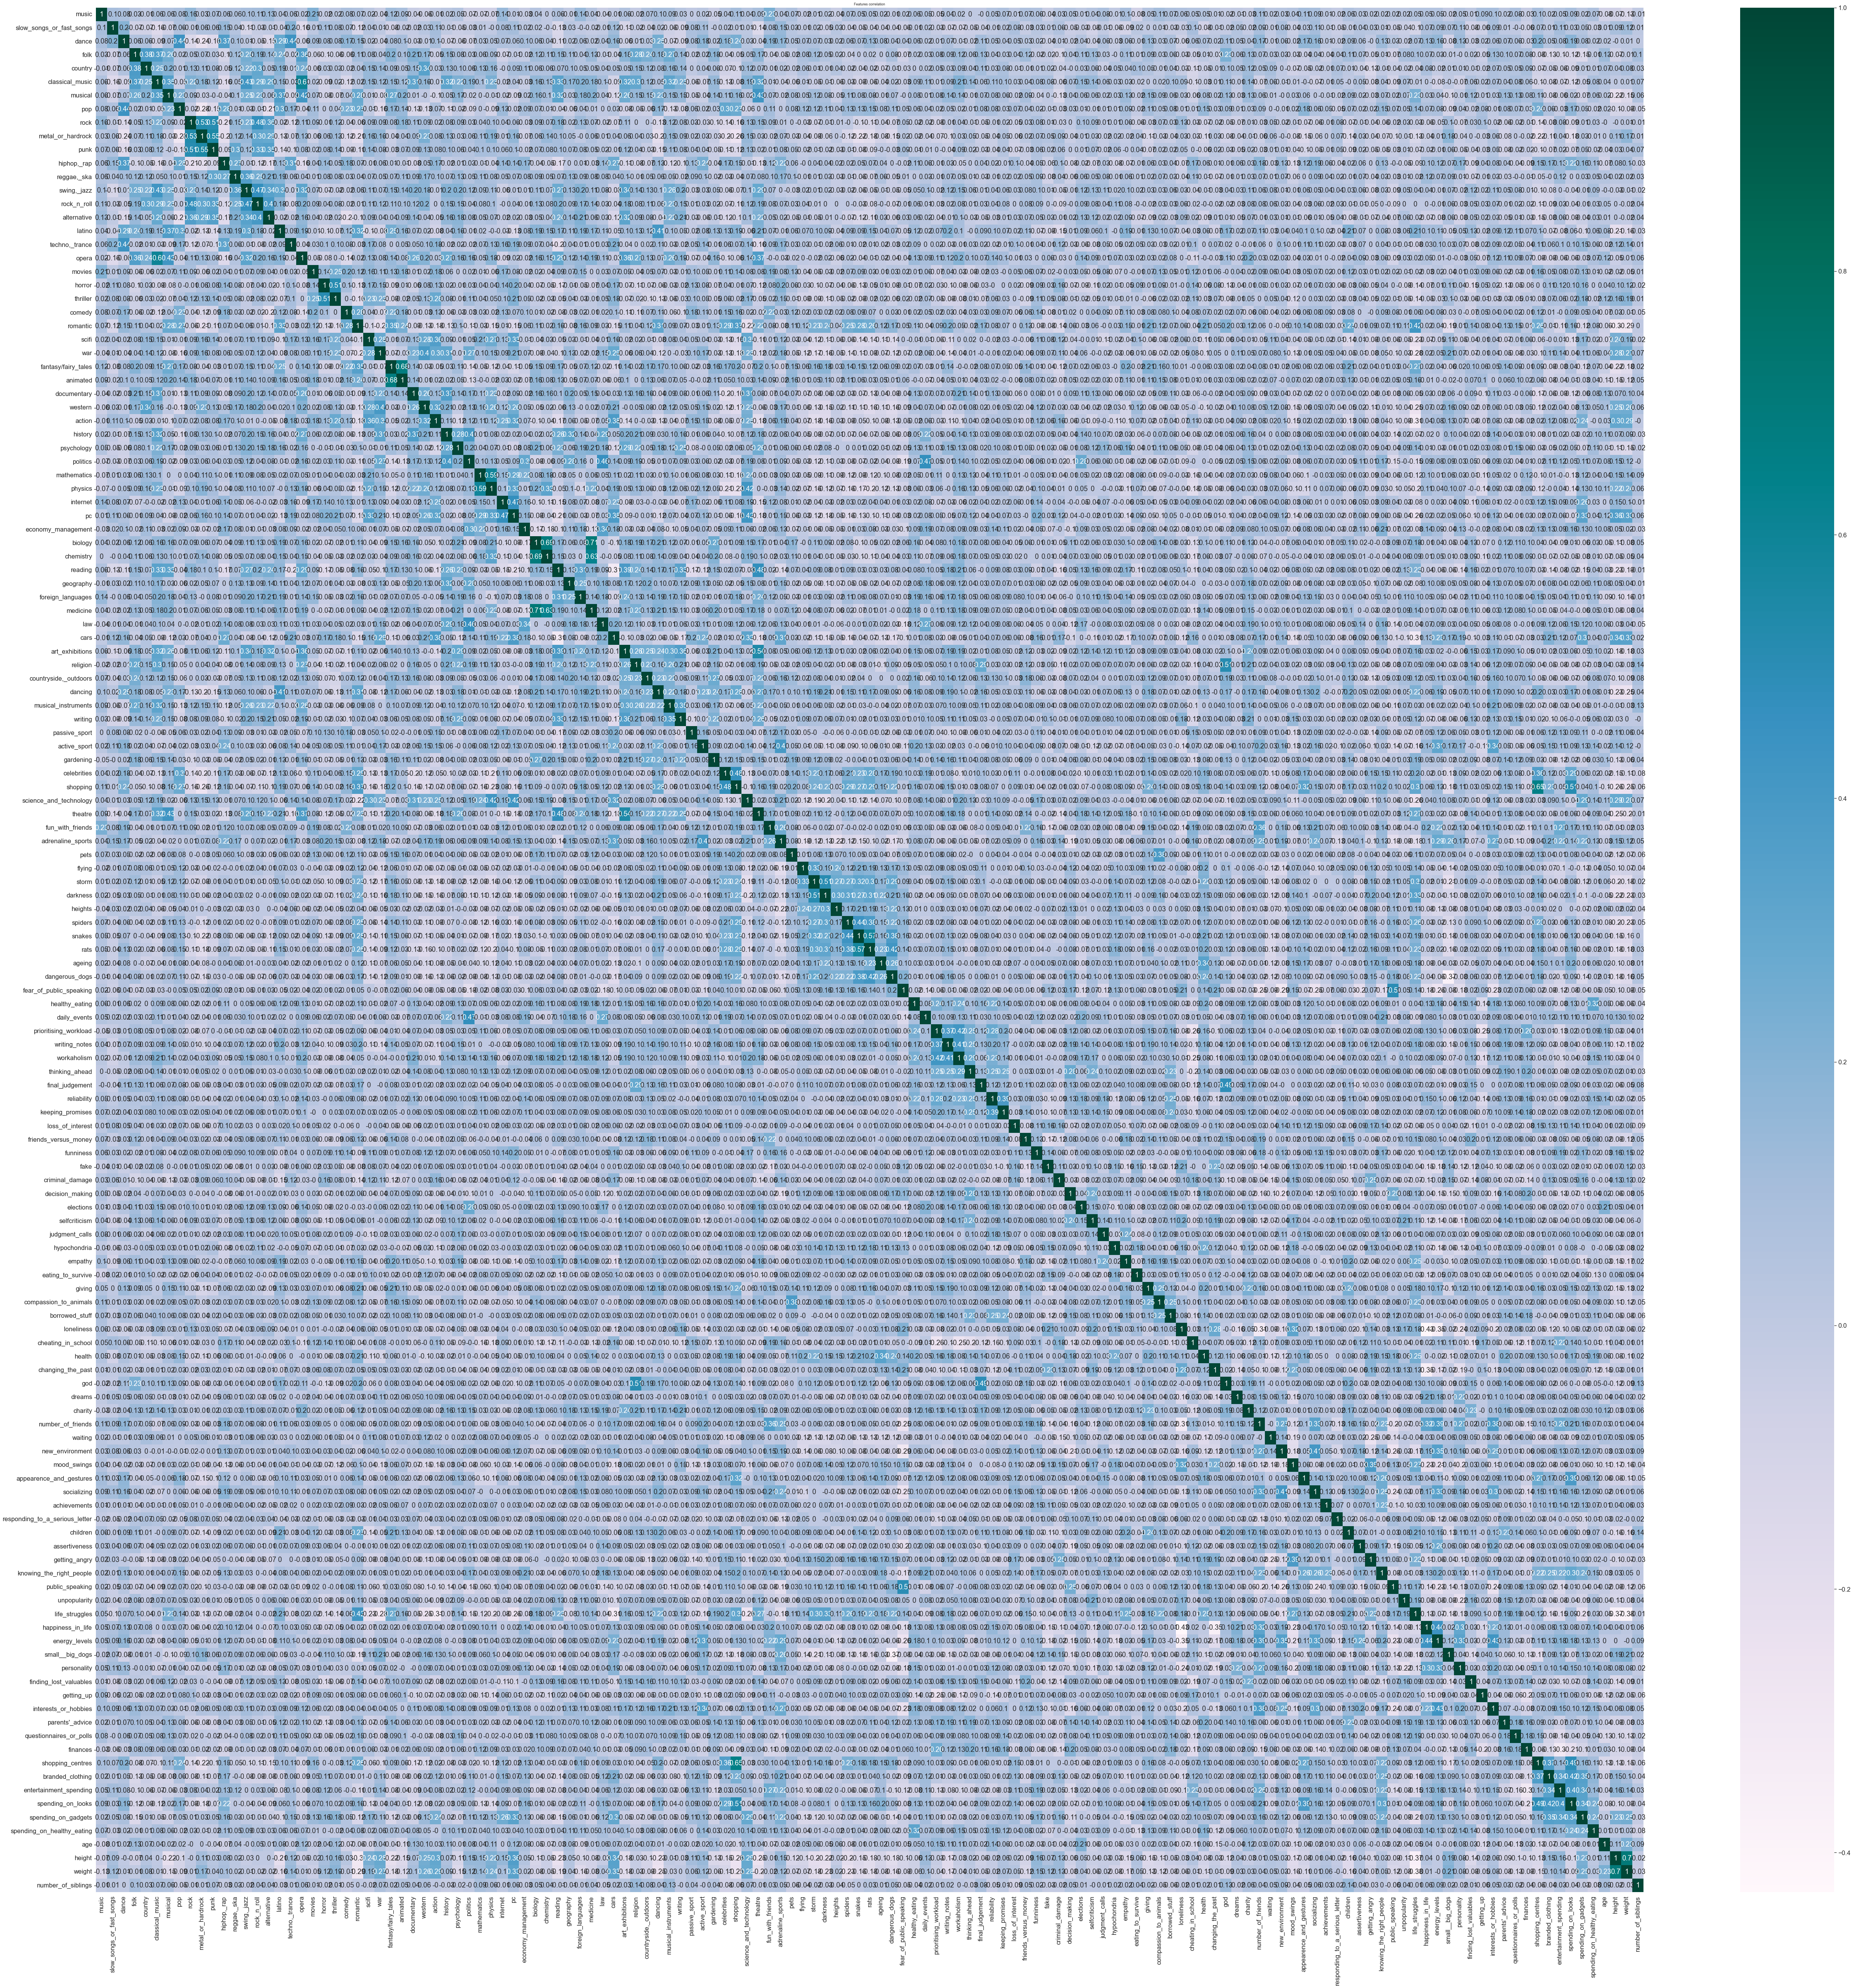

In [128]:
plt.figure(figsize=(90,90))
hm=sns.heatmap(corr.round(2),cmap="PuBuGn",annot=True)
hm.set_title('Features correlation', fontdict={'fontsize':9})

There are many correlations, consider downloading the image for better inspection

## 3) Feature importance 

#### 3.1) Feature importance - numerical variables

I suppose that a numerical feature is important, if the average of male and female is very different in such feature.

In [129]:
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    df_group = df_train.groupby(['gender']).mean().reset_index()
    df_group.set_index("gender", inplace=True)
    df_group= df_group.T
    df_group['diff'] = np.abs(df_group['female'] -df_group['male']) 
    df_group =df_group[df_group['diff']>0.5]
    display(df_group.sort_values(by='diff',ascending=False))

gender                      female        male       diff
weight                   59.253669   76.839228  17.585560
height                  167.732218  181.618590  13.886372
life_struggles            3.646694    2.053797   1.592897
cars                      2.171134    3.458861   1.287727
pc                        2.622407    3.803797   1.181391
reading                   3.572314    2.449045   1.123269
war                       2.713992    3.828571   1.114580
romantic                  3.938272    2.831746   1.106526
shopping                  3.736626    2.692063   1.044562
spiders                   3.245868    2.222930   1.022938
dancing                   2.874486    1.869841   1.004644
action                    3.123711    4.113924   0.990213
science_and_technology    2.855372    3.806349   0.950977
theatre                   3.385892    2.482428   0.903464
age                      20.129897   20.990446   0.860549
scifi                     2.727835    3.566456   0.838621
darkness                  2.609053    1.771429   0.837625
western                   1.825462    2.638978   0.813516
latino                    3.156701    2.355769   0.800932
physics                   1.743802    2.512658   0.768857
rats                      2.734568    1.990476   0.744092
snakes                    3.308008    2.585443   0.722565
musical                   3.030864    2.314286   0.716578
fantasy/fairy_tales       4.041068    3.324841   0.716227
spending_on_gadgets       2.605749    3.313291   0.707542
storm                     2.263374    1.572785   0.690590
celebrities               2.663918    2.000000   0.663918
writing_notes             3.347737    2.713376   0.634361
dangerous_dogs            3.308642    2.677215   0.631427
art_exhibitions           2.848861    2.226115   0.622747
active_sport              3.068041    3.644444   0.576403
giving                    3.174897    2.609524   0.565373
criminal_damage           2.369295    2.914286   0.544991
animated                  3.995885    3.469841   0.526044
shopping_centres          3.451546    2.933544   0.518002
foreign_languages         3.989712    3.479233   0.510479

#### Context

- I cry when I feel down or things don't go the right way /life_struggles
- cars /cars
- PC Software, Hardware /pc
- War movies /war 
- Poetry reading/reading
- Romantic movies/romantic



#### Complete Validation framework

In [130]:
df_train['gender'] = (df_train['gender']=='male').astype('int')
df_test['gender'] = (df_test['gender']=='male').astype('int')

In [131]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.gender.values
y_test = df_test.gender.values

del df_train['gender']
del df_test['gender']

In [132]:
categorical = list(df_train.dtypes[df.dtypes == 'object'].index)
numerical = list(df_train.dtypes[df.dtypes != 'object'].index)

In [133]:
def prepare_X(actual_df):
    df_prepare = actual_df.copy()
    # Replace nulls categorical values with mode
    for column in categorical:
        df_prepare[column].fillna(df_train[column].mode()[0], inplace=True)
    # Replace null numerical values with mean
    df_prepare[numerical] = df_prepare[numerical].fillna(df_train.mean())
    return df_prepare

In [134]:
prepare_train = prepare_X(df_train)
prepare_test = prepare_X(df_test)

<ipython-input-133-391d7204cc0a>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_prepare[numerical] = df_prepare[numerical].fillna(df_train.mean())
<ipython-input-133-391d7204cc0a>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_prepare[numerical] = df_prepare[numerical].fillna(df_train.mean())


### Feature Importance

In [135]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series,y_train)

mi = prepare_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

internet_usage           0.011730
alcohol                  0.011181
education                0.007394
punctuality              0.004916
left__right_handed       0.003283
smoking                  0.001576
lying                    0.001271
only_child               0.000893
house__block_of_flats    0.000029
village__town            0.000012
dtype: float64

It seems that the categories 'alcohol' 'internet_usage' and 'education' are the most important

## 4) Model selection

In [136]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import GridSearchCV

In [157]:
dv = DictVectorizer(sparse=False)

train_dicts = prepare_train.to_dict(orient='records')
test_dicts = prepare_test.to_dict(orient='records')

In [158]:
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)

## 4.1 Explore multiple classifiers

#### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(n_jobs=-1,max_iter=1000,random_state=42)
tunning = {'C':[0.1,0.2,0.3,0.5,0.8,1.2,2,3]}
classifier = GridSearchCV(model,tunning,cv=3,return_train_score=False,n_jobs=-1,verbose=3)
classifier.fit(X_train,y_train)
df_score_lr = pd.DataFrame(classifier.cv_results_)[['params','mean_test_score','std_test_score']]
df_score_lr['classifier'] = 'logistic_regression'

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [140]:
df_score_lr.sort_values(by='mean_test_score',ascending=False)

params  mean_test_score  std_test_score           classifier
1  {'C': 0.2}         0.925266        0.018597  logistic_regression
0  {'C': 0.1}         0.925261        0.016225  logistic_regression
2  {'C': 0.3}         0.920291        0.014445  logistic_regression
4  {'C': 0.8}         0.920291        0.014445  logistic_regression
5  {'C': 1.2}         0.920291        0.014445  logistic_regression
3  {'C': 0.5}         0.919047        0.012727  logistic_regression
6    {'C': 2}         0.917803        0.016987  logistic_regression
7    {'C': 3}         0.916555        0.017365  logistic_regression

the best score is 0.925+-0.016 with params `{'C': 0.1}`

#### Neural network

In [141]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=1000,random_state=42,n_iter_no_change=400,learning_rate_init=0.001,batch_size=50)
tunning = {'alpha':[0,0.5,1],'hidden_layer_sizes':[(100),(200),(400),(50,50),(10,10,10)],'solver':['lbfgs','adam']}
classifier = GridSearchCV(model,tunning,cv=2,return_train_score=False,n_jobs=-1,verbose=3)
classifier.fit(X_train,y_train)
df_score_nn = pd.DataFrame(classifier.cv_results_)[['params','mean_test_score','std_test_score']]
df_score_nn['classifier'] = 'neural_network'

Fitting 2 folds for each of 30 candidates, totalling 60 fits


c:\Users\user\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [142]:
df_score_nn.sort_values(by='mean_test_score',ascending=False)
#.head(1).values

params  mean_test_score  \
27  {'alpha': 1, 'hidden_layer_sizes': (50, 50), '...         0.927752   
19  {'alpha': 0.5, 'hidden_layer_sizes': (10, 10, ...         0.926505   
17  {'alpha': 0.5, 'hidden_layer_sizes': (50, 50),...         0.924005   
13  {'alpha': 0.5, 'hidden_layer_sizes': 200, 'sol...         0.922758   
15  {'alpha': 0.5, 'hidden_layer_sizes': 400, 'sol...         0.919036   
29  {'alpha': 1, 'hidden_layer_sizes': (10, 10, 10...         0.917796   
23  {'alpha': 1, 'hidden_layer_sizes': 200, 'solve...         0.914067   
6   {'alpha': 0, 'hidden_layer_sizes': (50, 50), '...         0.914046   
5   {'alpha': 0, 'hidden_layer_sizes': 400, 'solve...         0.907824   
9   {'alpha': 0, 'hidden_layer_sizes': (10, 10, 10...         0.906586   
21  {'alpha': 1, 'hidden_layer_sizes': 100, 'solve...         0.904095   
7   {'alpha': 0, 'hidden_layer_sizes': (50, 50), '...         0.904086   
8   {'alpha': 0, 'hidden_layer_sizes': (10, 10, 10...         0.902842   
3   {'alpha': 0, 'hidden_layer_sizes': 200, 'solve...         0.902836   
1   {'alpha': 0, 'hidden_layer_sizes': 100, 'solve...         0.901589   
28  {'alpha': 1, 'hidden_layer_sizes': (10, 10, 10...         0.900367   
26  {'alpha': 1, 'hidden_layer_sizes': (50, 50), '...         0.899105   
11  {'alpha': 0.5, 'hidden_layer_sizes': 100, 'sol...         0.897889   
16  {'alpha': 0.5, 'hidden_layer_sizes': (50, 50),...         0.897849   
20  {'alpha': 1, 'hidden_layer_sizes': 100, 'solve...         0.895370   
22  {'alpha': 1, 'hidden_layer_sizes': 200, 'solve...         0.895370   
10  {'alpha': 0.5, 'hidden_layer_sizes': 100, 'sol...         0.895370   
2   {'alpha': 0, 'hidden_layer_sizes': 200, 'solve...         0.892886   
14  {'alpha': 0.5, 'hidden_layer_sizes': 400, 'sol...         0.892883   
24  {'alpha': 1, 'hidden_layer_sizes': 400, 'solve...         0.892883   
0   {'alpha': 0, 'hidden_layer_sizes': 100, 'solve...         0.890408   
12  {'alpha': 0.5, 'hidden_layer_sizes': 200, 'sol...         0.890392   
4   {'alpha': 0, 'hidden_layer_sizes': 400, 'solve...         0.887917   
18  {'alpha': 0.5, 'hidden_layer_sizes': (10, 10, ...         0.886652   
25  {'alpha': 1, 'hidden_layer_sizes': 400, 'solve...         0.882979   

    std_test_score      classifier  
27        0.015034  neural_network  
19        0.016281  neural_network  
17        0.023756  neural_network  
13        0.025003  neural_network  
15        0.013799  neural_network  
29        0.010065  neural_network  
23        0.003843  neural_network  
6         0.021278  neural_network  
5         0.017549  neural_network  
9         0.011324  neural_network  
21        0.011327  neural_network  
7         0.018799  neural_network  
8         0.017556  neural_network  
3         0.022537  neural_network  
1         0.023784  neural_network  
28        0.005105  neural_network  
26        0.018806  neural_network  
11        0.004854  neural_network  
16        0.027524  neural_network  
20        0.017565  neural_network  
22        0.017565  neural_network  
10        0.017565  neural_network  
2         0.012587  neural_network  
14        0.015077  neural_network  
24        0.015077  neural_network  
0         0.002627  neural_network  
12        0.015080  neural_network  
4         0.002630  neural_network  
18        0.018821  neural_network  
25        0.032233  neural_network

the best score is 0.927+-0.015 with params `{'alpha': 1, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}`

# Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1, n_jobs=-1,warm_start=True)
tunning = {'n_estimators':list(range(10, 201, 10)),'max_depth':[10, 15, 20, 25]}
classifier = GridSearchCV(model,tunning,cv=2,return_train_score=False,n_jobs=-1,verbose=3)
classifier.fit(X_train,y_train)
df_score_rf = pd.DataFrame(classifier.cv_results_)[['params','mean_test_score','std_test_score']]
df_score_rf['classifier'] = 'random_forest'

Fitting 2 folds for each of 80 candidates, totalling 160 fits


In [144]:
df_score_rf.sort_values(by='mean_test_score',ascending=False)

params  mean_test_score  std_test_score  \
73  {'max_depth': 25, 'n_estimators': 140}         0.942702        0.010034   
33  {'max_depth': 15, 'n_estimators': 140}         0.942702        0.010034   
53  {'max_depth': 20, 'n_estimators': 140}         0.942702        0.010034   
19  {'max_depth': 10, 'n_estimators': 200}         0.941465        0.003809   
15  {'max_depth': 10, 'n_estimators': 160}         0.940221        0.002565   
..                                     ...              ...             ...   
1    {'max_depth': 10, 'n_estimators': 20}         0.917793        0.012556   
0    {'max_depth': 10, 'n_estimators': 10}         0.889167        0.001107   
60   {'max_depth': 25, 'n_estimators': 10}         0.887920        0.000140   
20   {'max_depth': 15, 'n_estimators': 10}         0.887920        0.000140   
40   {'max_depth': 20, 'n_estimators': 10}         0.887920        0.000140   

       classifier  
73  random_forest  
33  random_forest  
53  random_forest  
19  random_forest  
15  random_forest  
..            ...  
1   random_forest  
0   random_forest  
60  random_forest  
20  random_forest  
40  random_forest  

[80 rows x 4 columns]

the best score is 0.942+-0.01 with params {'max_depth': 25, 'n_estimators': 140}

### 4.2) Explore best classifier

`random forest` is the best classifier with a 94% of acurracy, so that, i am inspect this model a bit more


In [160]:
rf = RandomForestClassifier(random_state=1, n_jobs=-1,max_depth=25,n_estimators=140, warm_start=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=140, n_jobs=-1,
                       random_state=1, warm_start=True)

- Check in test dataset

In [161]:
rf.score(X_test,y_test)

0.9353233830845771

The test score (93.5%) is slightly different from the cross validation (94%)

- Look at feature importance

In [162]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names()
df_importances['importance'] = rf.feature_importances_
df_importances = df_importances.sort_values(by='importance', ascending=False)
df_importances.reset_index(drop=True)

c:\Users\user\anaconda3\envs\ml-zoomcamp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


feature  importance
0                                        height    0.150534
1                                        weight    0.110375
2                                life_struggles    0.056130
3                                            pc    0.031257
4                                      shopping    0.025390
..                                          ...         ...
166                  education=doctorate degree    0.000375
167                                 lying=never    0.000303
168                       smoking=former smoker    0.000230
169  education=currently a primary school pupil    0.000054
170               internet_usage=no time at all    0.000000

[171 rows x 2 columns]

In general, the importance of features here is very similar to that observed by the EDA in section 3.1

### 4.3) Feature Elimination

Feature removal in this case has two benefits, the first is to reduce the dimensionality/complexity of the model. The second is that, according to the commercial problem, we must select few characteristics, because if a user is filling out 149 questions, it is most likely that he will not want to complete it.

- To do this, only the top N of characteristics will be selected in order of importance and the results will be analyzed.

In [174]:
features = df_importances.feature.to_list()
data = []

for i in range(1,50):
    selected_features = features[0:i]
    trainDicts = prepare_train[selected_features].to_dict(orient='records')
    testDicts = prepare_test[selected_features].to_dict(orient='records')
    
    XTrain = dv.fit_transform(trainDicts)
    XTest = dv.transform(testDicts)
    
    rf = RandomForestClassifier(random_state=1, n_jobs=-1,max_depth=25,n_estimators=140, warm_start=True)
    rf.fit(XTrain, y_train)
    score = rf.score(XTest,y_test)
    data.append(dict(num_features=i, accuracy = score ))
    
df_feature_elimination = pd.DataFrame(data) 

(0.75, 1.0)

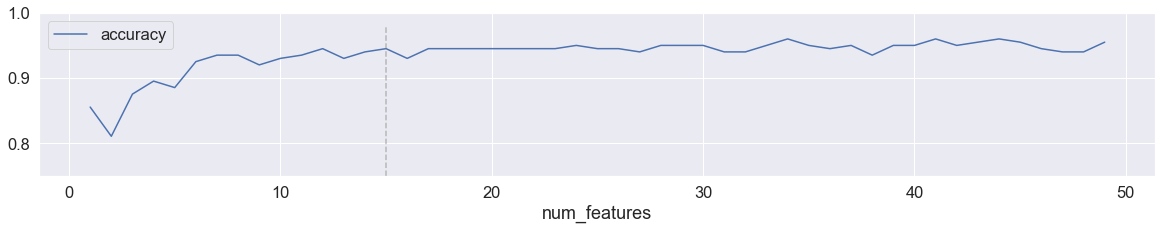

In [184]:
df_feature_elimination.plot(x='num_features',y='accuracy')
plt.vlines(15, 0.75, 0.98, color='grey', linestyle='--', alpha=0.5)
plt.ylabel = 'accuracy'
plt.ylim(0.75, 1)

From feature number 15, the model improves very little. So the 15 best characteristics to determine if you are male or female with a accuracy of 94.5% are:

In [186]:
selected_features = features[0:15]
selected_features

['height',
 'weight',
 'life_struggles',
 'pc',
 'shopping',
 'war',
 'action',
 'cars',
 'science_and_technology',
 'romantic',
 'reading',
 'western',
 'dancing',
 'theatre',
 'darkness']

#### Analysis

- For demographic characteristics, `height` and` weight` are very particular for the `male` and `female` gender.
- The following patterns of personal or psychological tastes mark an important factor in deciding if you are a man or a woman.

| short name          | full name    | avg (female)    | avg (male)|
|--------------|-----------|-----------|-----------|  
| life_struggles | Cries when feels down or things are not going well.|3.6|2.0|
|pc      | like PC software, hardware  | 2.6|3.8|
| shopping | like shopping      |3.7|2.7|
| war      | like war movies  |2.7|3.8|
| action | like action movies      |3.1|4.1|
| cars      | like cars  |2.17|3.4|
| science_and_technology | like science and technology  |2.8|3.8|
| romantic      |like romantic movies  |3.9|2.8|
| reading | like poetry reading      |3.6|2.4|
| western      | like western movies  |1.82|2.6|
| dancing |like dancing       |2.8|1.9|
| theatre      | like theatre |3.4|2.5|




### 4.4  Build end model

In [188]:
trainDicts = prepare_train[selected_features].to_dict(orient='records')
testDicts = prepare_test[selected_features].to_dict(orient='records')

XTrain = dv.fit_transform(trainDicts)
XTest = dv.transform(testDicts)

rf = RandomForestClassifier(random_state=1, n_jobs=-1,max_depth=25,n_estimators=140, warm_start=True)
rf.fit(XTrain, y_train)

RandomForestClassifier(max_depth=25, n_estimators=140, n_jobs=-1,
                       random_state=1, warm_start=True)

### 5) Evaluation

In [191]:
y_pred = rf.predict(XTest)

### 5.1 Confusion Matrix

[Text(0.5, 43.5, 'Predicted'), Text(43.5, 0.5, 'Actual')]

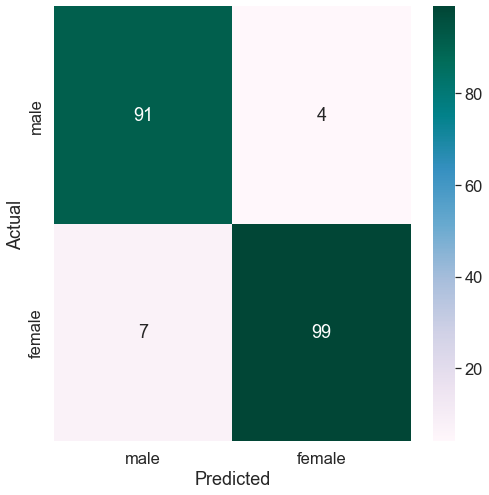

In [198]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_labels =list(map(lambda x: "male" if x == 1 else "female",y_pred))
y_test_labels =list(map(lambda x: "male" if x == 1 else "female",y_test))

cm = confusion_matrix(y_test_labels, y_pred_labels,labels=['male','female'])

cm_df = pd.DataFrame(cm ,columns=['male','female'],index=['male','female'])
plt.figure(figsize=(8, 8))
plot =sns.heatmap(cm_df,cmap="PuBuGn",annot=True,fmt='g')
plot.set(xlabel='Predicted', ylabel='Actual')

### 5.2 Metrics

In [199]:
print(classification_report(y_pred_labels, y_test_labels, labels=['male','female']))

              precision    recall  f1-score   support

        male       0.96      0.93      0.94        98
      female       0.93      0.96      0.95       103

    accuracy                           0.95       201
   macro avg       0.95      0.94      0.95       201
weighted avg       0.95      0.95      0.95       201



This is great, in general the metrics are high for `male` and `female`.

### 5.3 AUC

In [201]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_test, y_pred)
round(score,3)

0.946

In [ ]:
'''import bentoml

tag = bentoml.sklearn.save_model('ml_proyect', clf_lr,custom_objects={
    'DictVectorizer':dv
})
print(tag)'''

"import bentoml\n\ntag = bentoml.sklearn.save_model('ml_proyect', clf_lr,custom_objects={\n    'DictVectorizer':dv\n})\nprint(tag)"

In [ ]:
!bentoml models get ml_proyect:latest

name: ml_proyect                                                               
version: a2x6jvkyqcposlhq                                                      
module: bentoml.sklearn                                                        
labels: {}                                                                     
options: {}                                                                    
metadata: {}                                                                   
context:                                                                       
  framework_name: sklearn                                                      
  framework_versions:                                                          
    scikit-learn: 1.1.2                                                        
  bentoml_version: 1.0.7                                                       
  python_version: 3.9.13                                                       
signatures:                             